In [1]:
%config InlineBackend.figure_formats = ['retina']

In [2]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

sns.set()

In [3]:
data = pd.read_csv('./data/panel_data_04_05.csv')

In [4]:
data = data[data['scraping_date'] == '26-04-2021']

In [5]:
data.head(3)

,name,languages,description,rating,nb_reviews,Price/hour in USD,skills,industry_expertise,nb_projects,nb_buyers,last_active,gender,city,country,score,scraping_date
0,Maria H.,['English'],We are a small UK based company speciaIising i...,4.9,4694,34.74,"['animation', 'graphics design', 'brand design...","['it', 'internet', 'marketing', 'media', 'tech...",7672,4168,26-04-2021,female,Sheffield,United Kingdom,10.043,26-04-2021
2,Jessica O'Neill,['English'],Your blog content and website copy need to be ...,5.0,1215,76.42,"['editing', 'proofreading', 'transcription', '...","['pr', 'sales', 'travel']",1541,878,26-04-2021,female,City of London,United Kingdom,8.712,26-04-2021
4,Scott Anfield,['English'],An experienced and professional writer based i...,4.9,1719,20.84,"['article', 'product description', 'content wr...","['advertising', 'education', 'marketing', 'sal...",1750,1071,25-04-2021,male,Doncaster,United Kingdom,9.039,26-04-2021


In [14]:
data.describe(include='all')

,name,languages,description,rating,nb_reviews,Price/hour in USD,skills,industry_expertise,nb_projects,nb_buyers,last_active,gender,city,country,score,scraping_date
count,9395,9395,8711,9395.000000,9395.000000,9395.000000,9395,9395,9395.000000,9395.000000,9395,9395,9387,9395,9395.000000,9395
unique,9212,914,8585,NaN,NaN,NaN,9170,4412,NaN,NaN,369,3,2263,155,NaN,1
top,Mohsin Ali,['English'],My name is Mohsin Ali and I am Professional Ex...,NaN,NaN,NaN,[],[],NaN,NaN,25-04-2021,female,London,United Kingdom,NaN,26-04-2021
freq,20,3469,5,NaN,NaN,NaN,40,3048,NaN,NaN,916,3882,682,3422,NaN,9395
mean,NaN,NaN,NaN,3.592134,30.830974,27.715894,NaN,NaN,32.592975,21.302501,NaN,NaN,NaN,NaN,2.887867,NaN
std,NaN,NaN,NaN,2.189298,150.821035,33.308722,NaN,NaN,222.544467,136.229602,NaN,NaN,NaN,NaN,2.164955,NaN
min,NaN,NaN,NaN,0.000000,0.000000,8.340000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,12.080000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,20.000000,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,3.045000,NaN
75%,NaN,NaN,NaN,5.000000,17.000000,34.740000,NaN,NaN,16.000000,12.000000,NaN,NaN,NaN,NaN,4.434000,NaN


[Text(0, 0.5, 'Rating'),
 Text(0, 1.5, 'Nb_reviews'),
 Text(0, 2.5, 'Nb_projects'),
 Text(0, 3.5, 'Nb_buyers'),
 Text(0, 4.5, 'Score')]

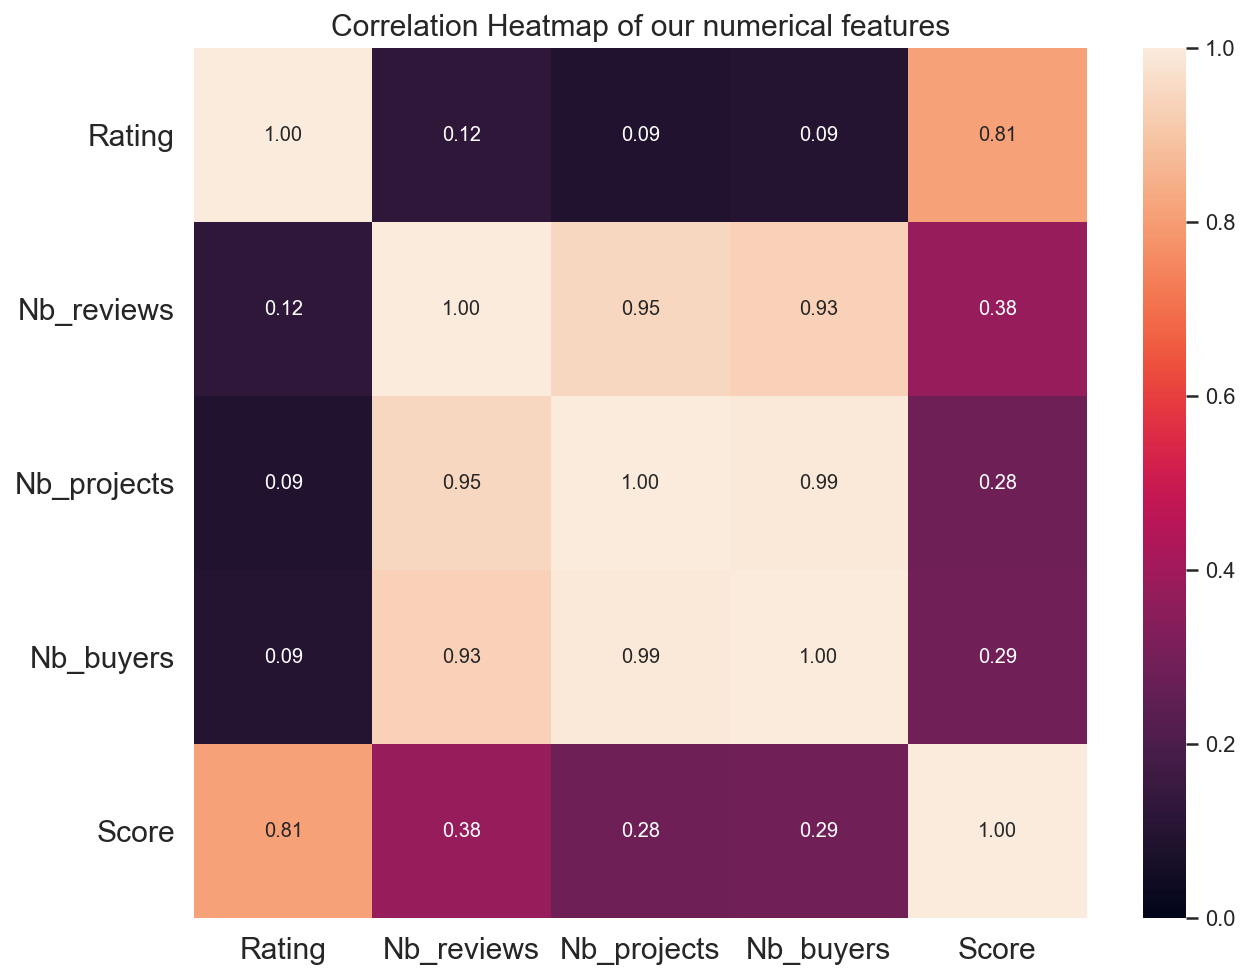

In [29]:
corr = data[['rating', 'nb_reviews', 'nb_projects', 'nb_buyers', 'score']].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, vmin=0, vmax=1, annot=True, fmt=".2f")
heatmap.set_title('Correlation Heatmap of our numerical features', size=15)
labels = ['Rating', 'Nb_reviews', 'Nb_projects', 'Nb_buyers', 'Score']
heatmap.set_xticklabels(labels, fontsize = 15, rotation=0)
heatmap.set_yticklabels(labels, fontsize = 15, rotation=0)

number of countries : 155


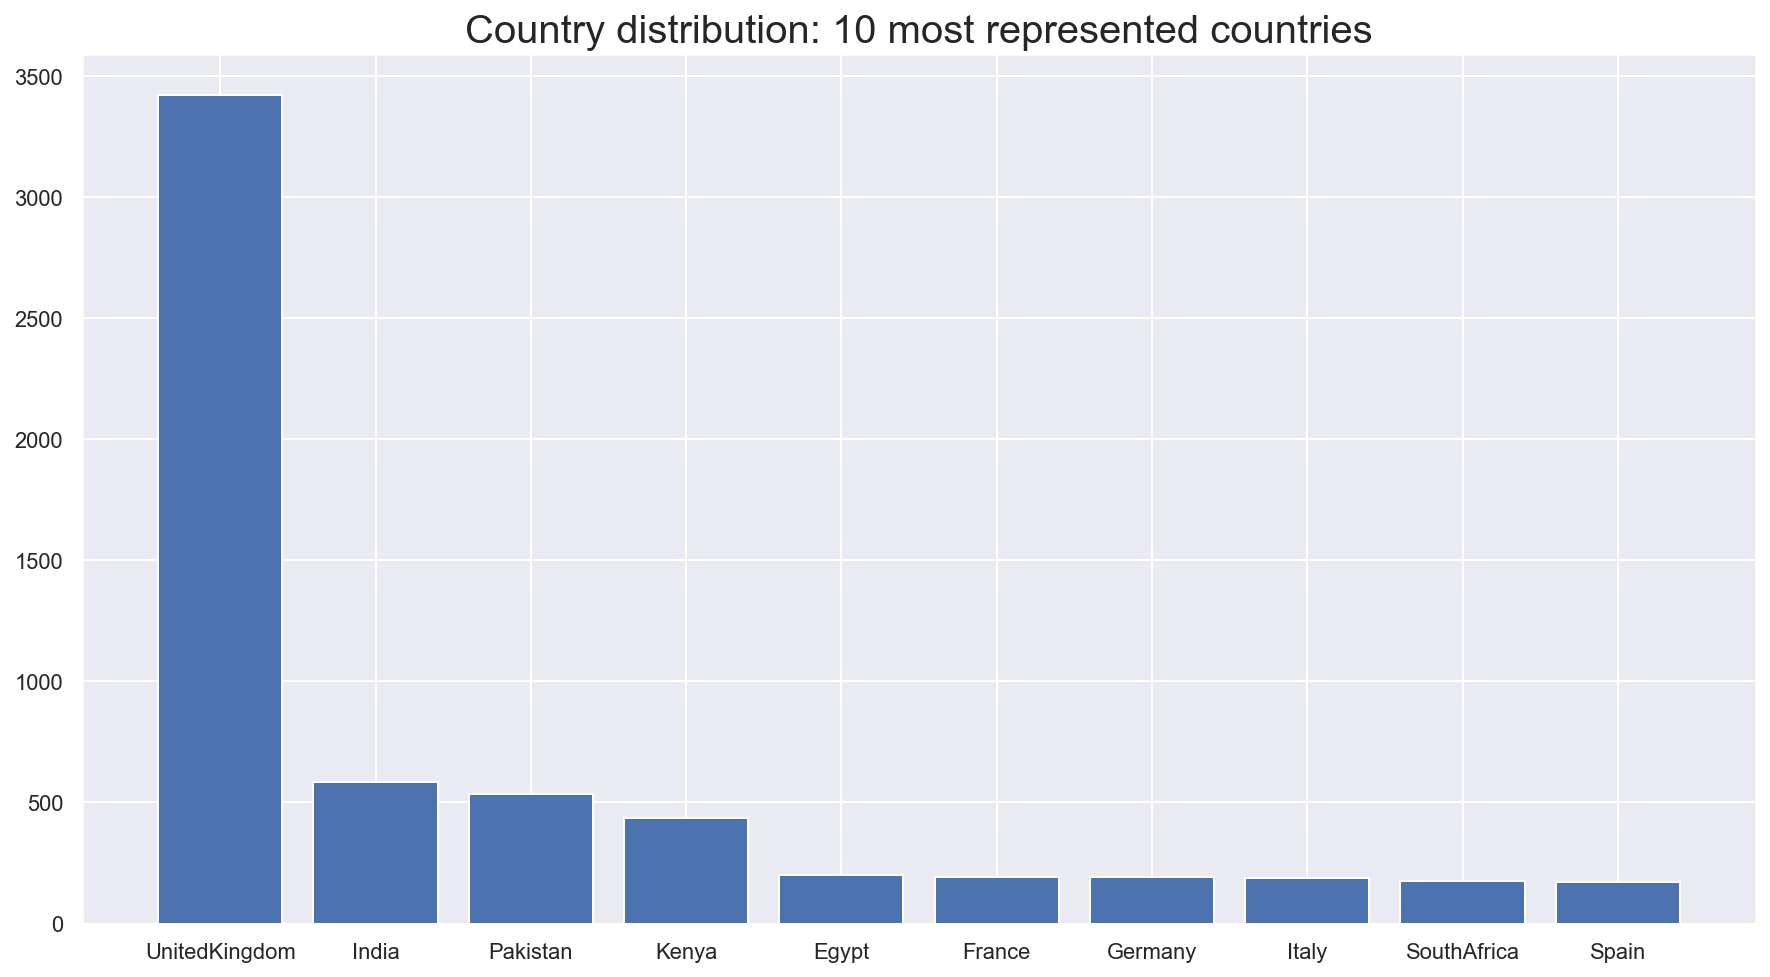

In [103]:
location = data['country']

country = [ l.split(',')[-1].replace(" ", "") for l in location ]
count = Counter(country).most_common(10)

print('number of countries :', len(Counter(country)))

figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Country distribution: 10 most represented countries", fontsize = 20)
plt.show()

126


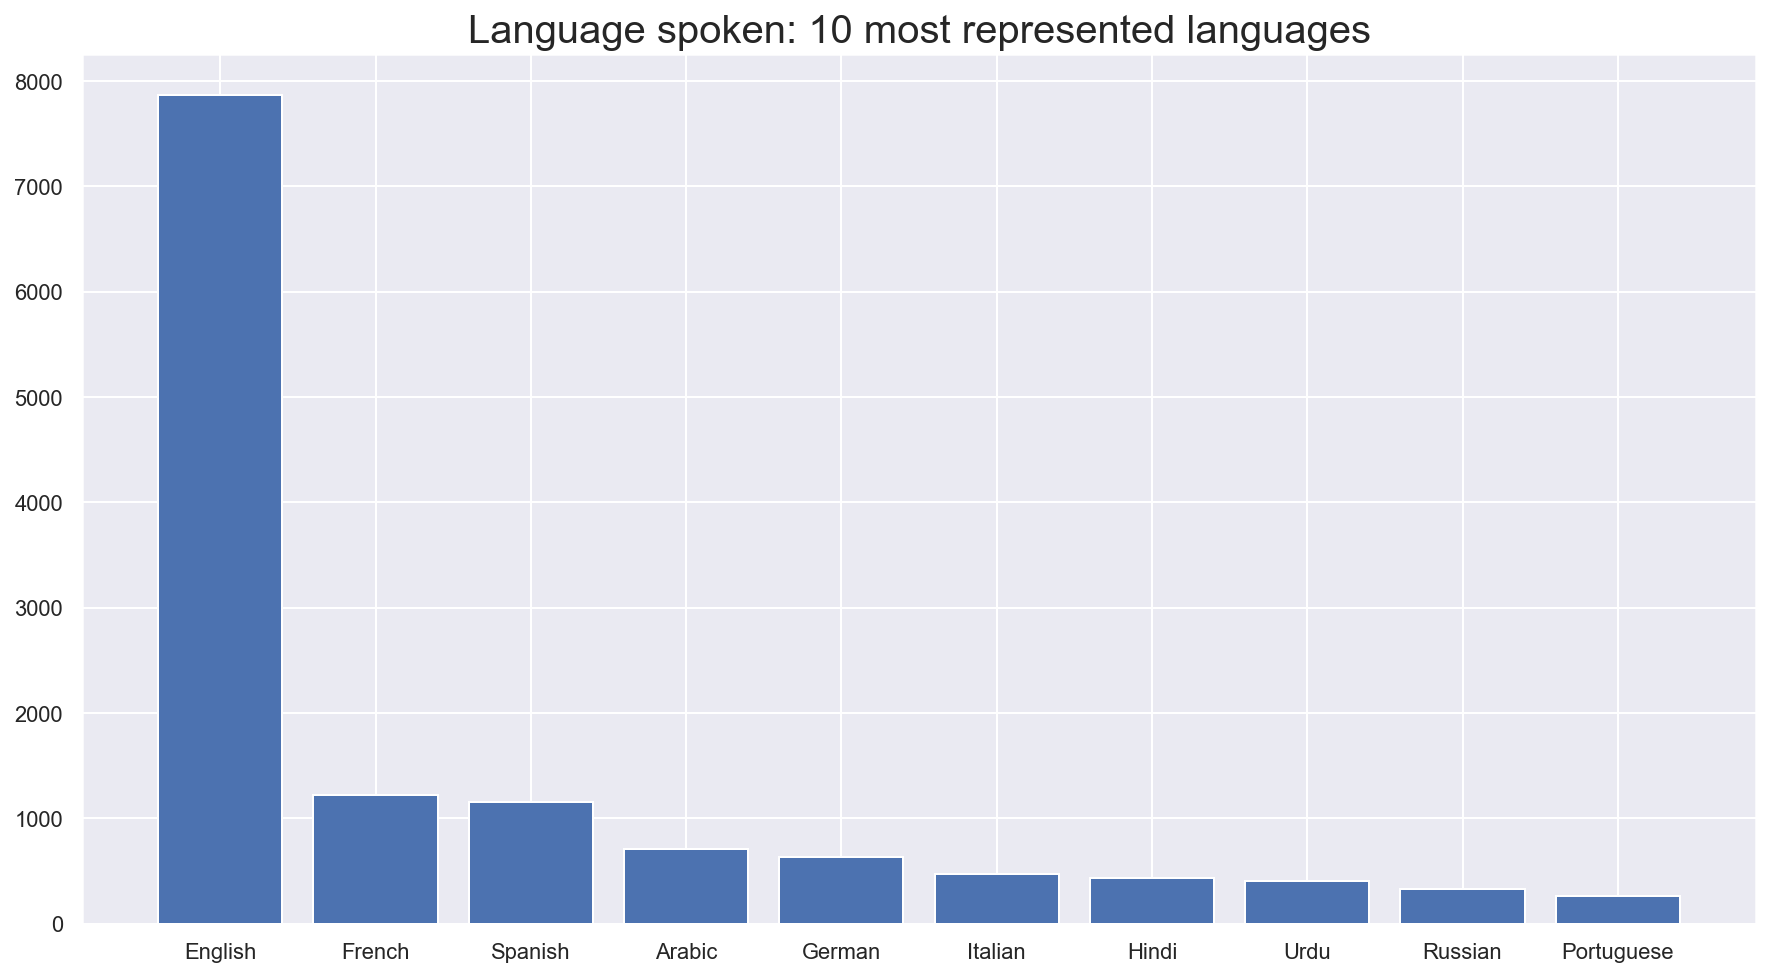

In [104]:
speaking = data['languages']
language = []

for s in speaking :
    zeub = str(s).replace("speaking", "").replace("and", "").replace("nan", "").replace("'","")
    zanzi = re.findall(r"[\w']+", zeub)
    for l in zanzi :
        language.append(l)
    
count = Counter(language).most_common(10)
print(len(Counter(language)))
figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Language spoken: 10 most represented languages", fontsize = 20)
plt.show()

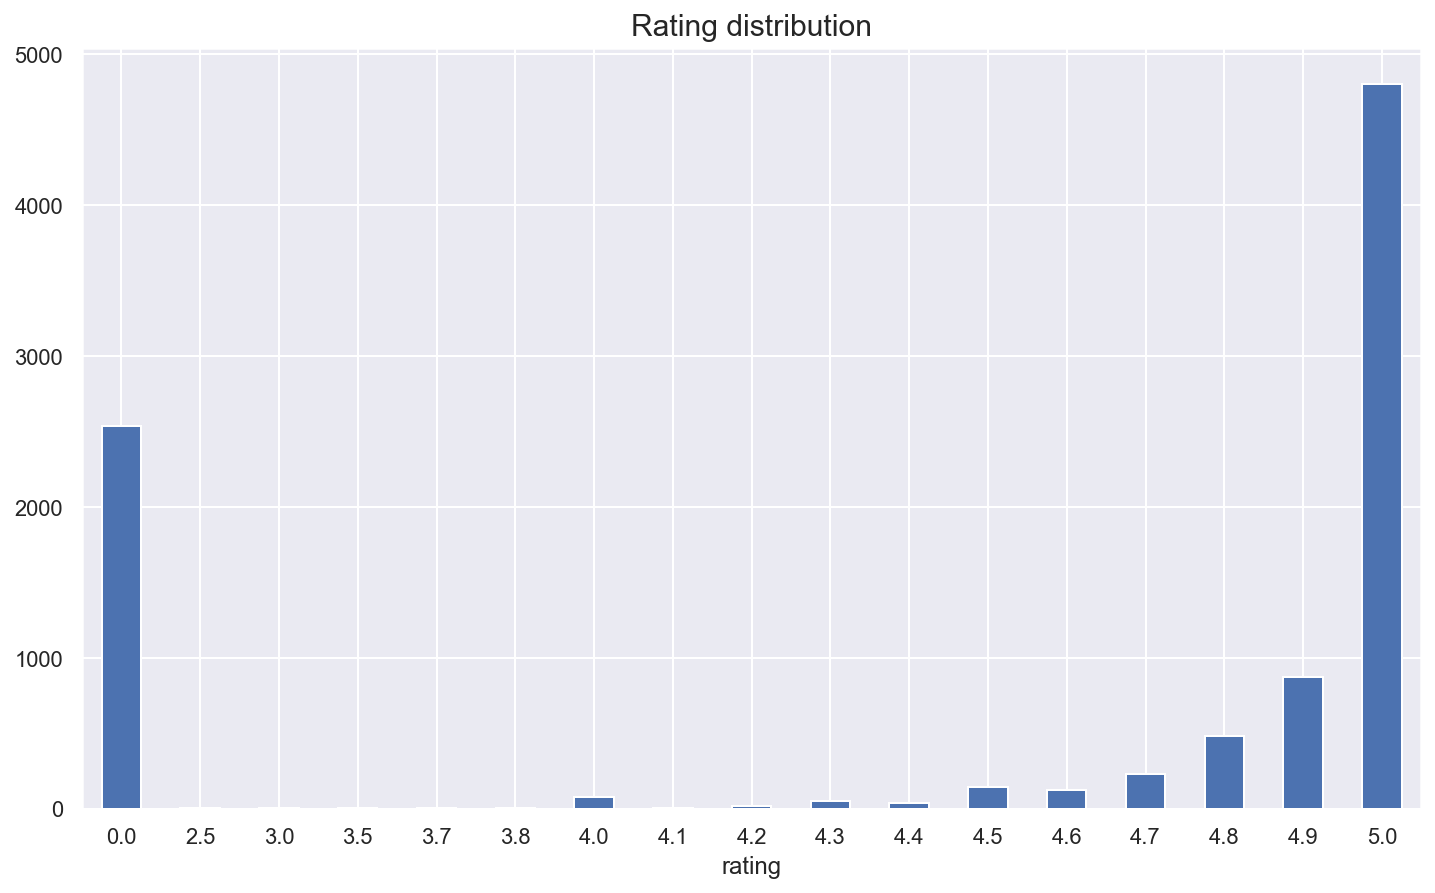

Number of workers with null rating : 2535
Number of workers with inactive profiles (no projects and null rating) : 2447
mean of female ratings :  4.21
mean of male ratings :  3.9
mean of undefined ratings :  2.2


In [110]:
plt_rating_gender = data.groupby(['rating'])['rating'].count().fillna(0)
plt_rating_gender.plot(kind='bar', stacked=True,figsize=(12,7),rot=0)
plt.title('Rating distribution', fontsize=15)
plt.show()

print('Number of workers with null rating :', len(data.loc[(data['rating'] == 0)]))
print('Number of workers with inactive profiles (no projects and null rating) :',  len(data.loc[(data['rating'] == 0) & (data['nb_projects'] == 0)]))
print('mean of female ratings : ', round(data[data['gender'] == 'female']['rating'].mean(),2))
print('mean of male ratings : ', round(data[data['gender'] == 'male']['rating'].mean(),2))
print('mean of undefined ratings : ', round(data[data['gender'] == 'unknown']['rating'].mean(),2))

Text(0.5, 1.0, 'Average price per country')

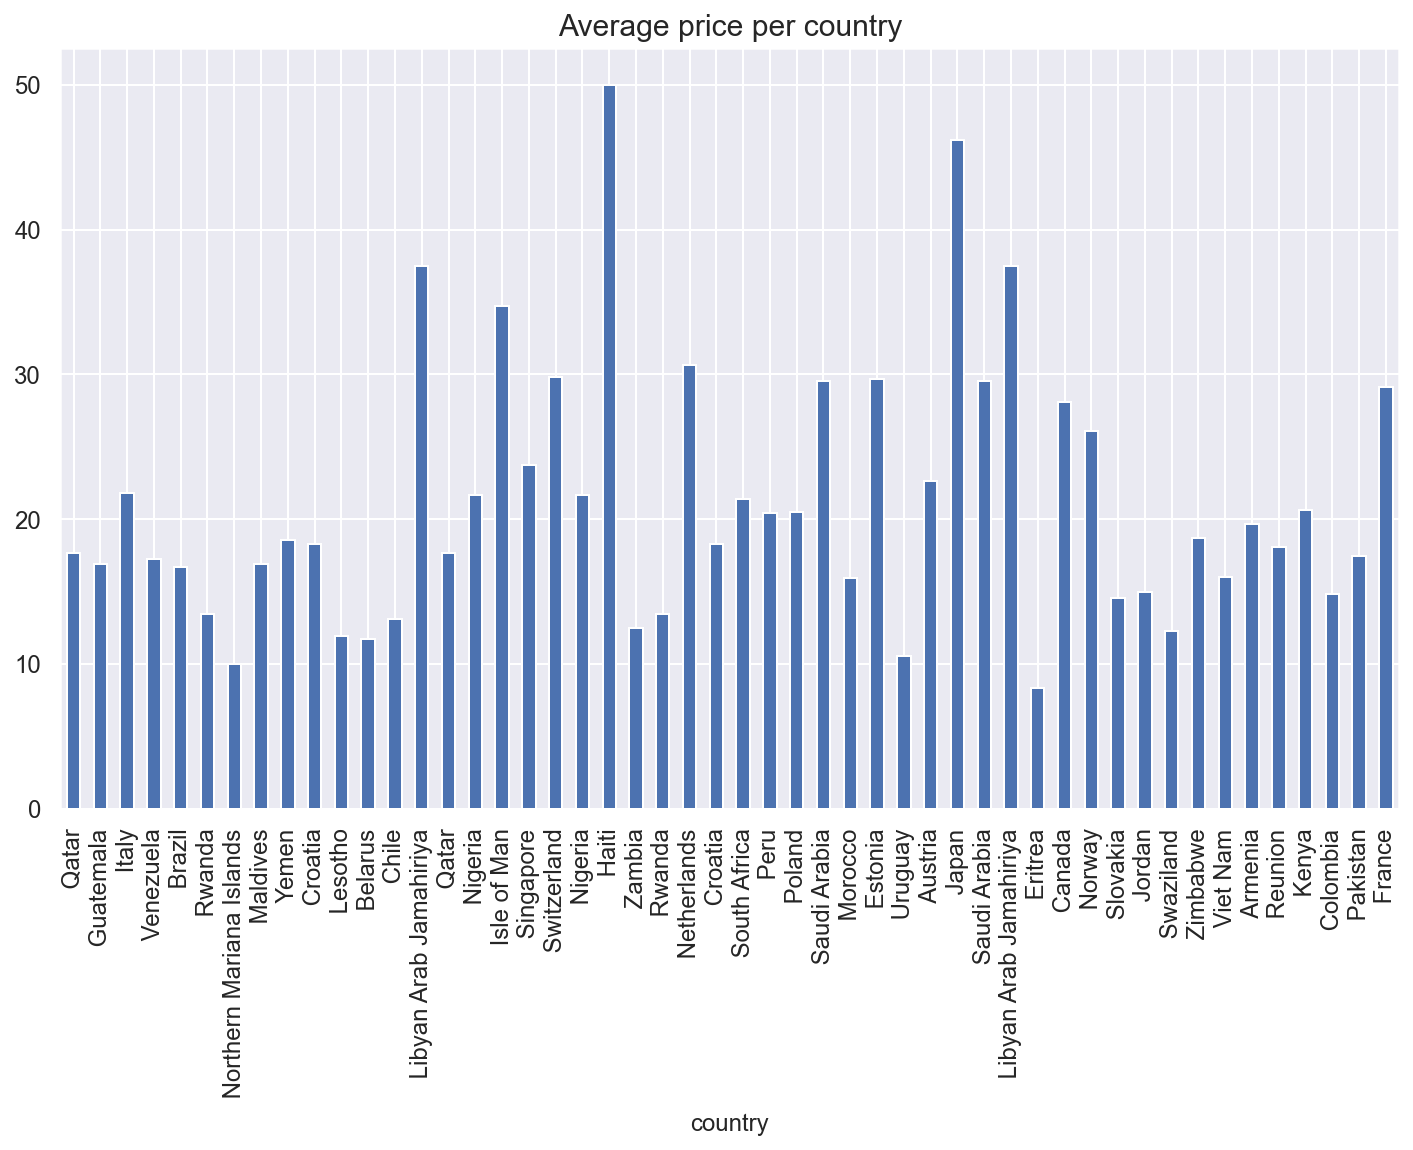

In [63]:
price_country = data.groupby(['country'])['Price/hour in USD'].mean()
random_countries = np.random.randint(0,len(price_country),size=50)
price_country = price_country[random_countries]
price_country.plot(kind='bar',figsize=(12,7), fontsize=12)
plt.title('Average price per country', size=15)

All the workers have good grades. Only a minority of them has a rating lower than 4.9 as the null rating are only inactive profiles

Text(0.5, 1.0, 'Score distribution')

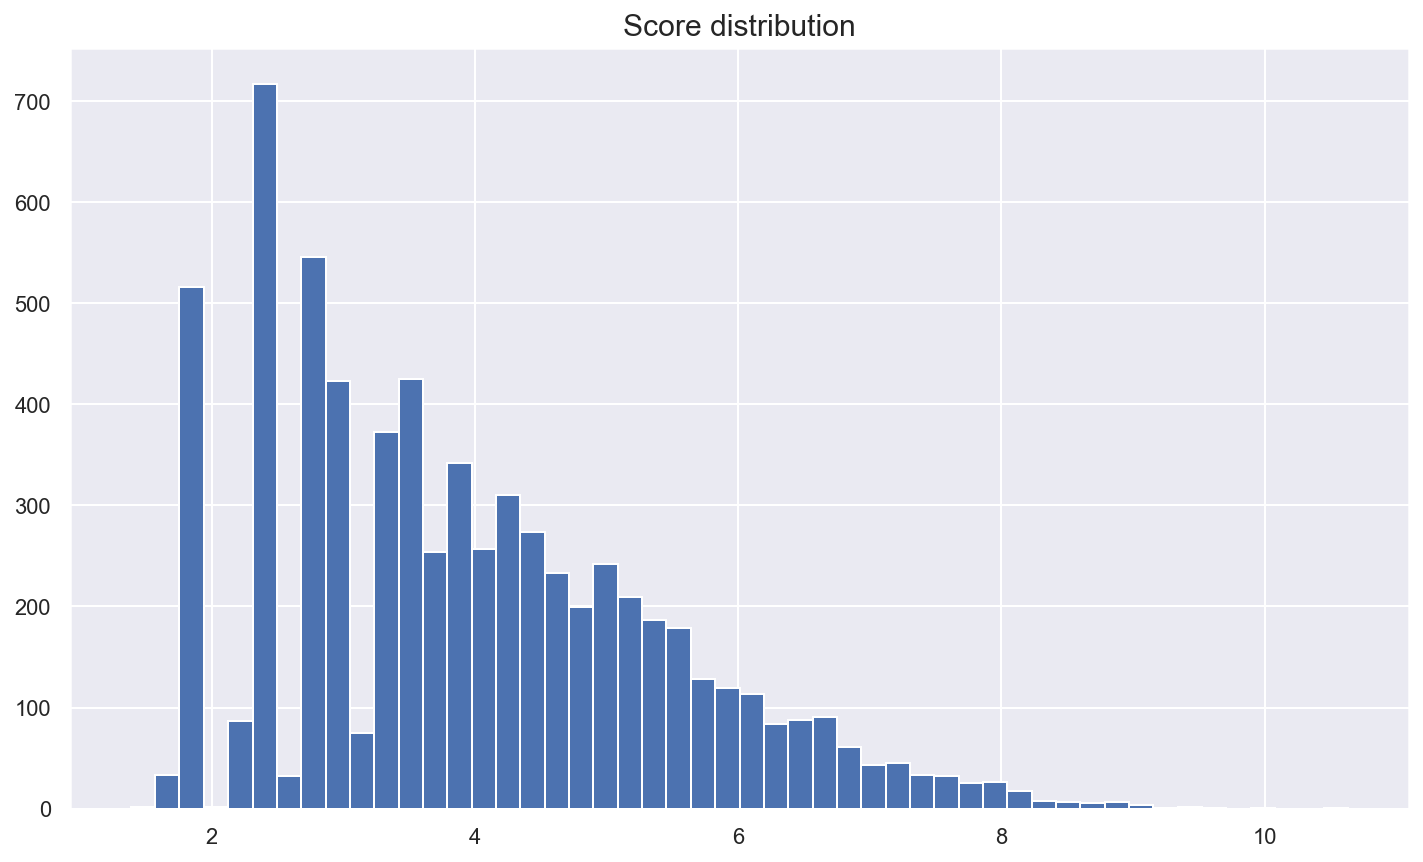

In [86]:
figure = plt.figure(figsize=(12,7))

data[data['score'] != 0]['score'].hist(bins = 50)
plt.title("Score distribution", size=15)

8647
Proportion of active profiles with more than 1000 reviews :  0.41000000000000003 %


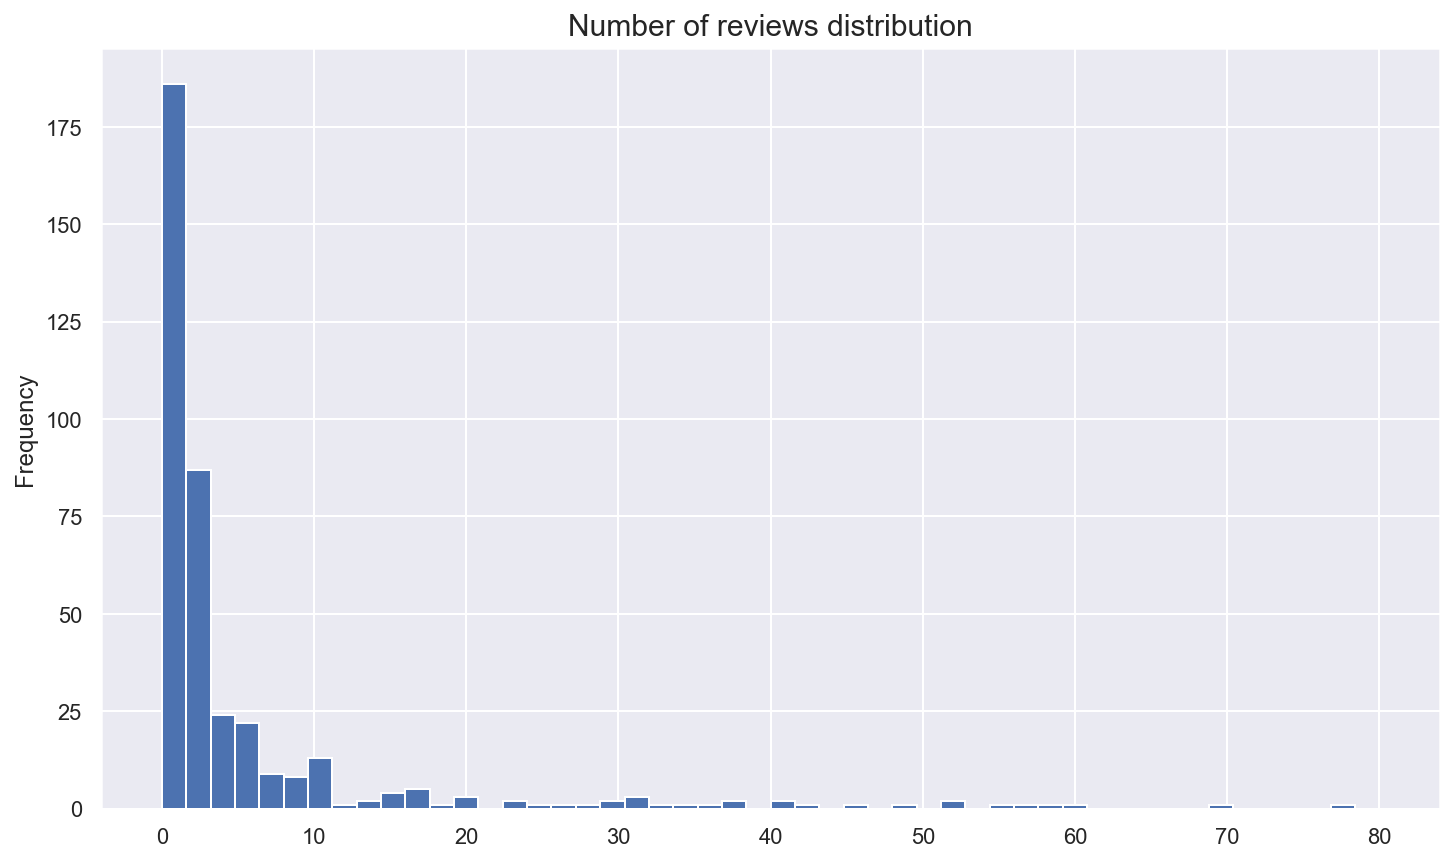

In [96]:
figure = plt.figure(figsize=(12,7))
plt.title('Number of reviews distribution', size=15)
plt_reviews = data.loc[(0<data['nb_reviews'])].groupby('nb_reviews')['nb_reviews'].count()
plt_reviews.plot(kind='hist', range = [0,80], bins = 50)
print(np.max(data['nb_reviews']))

print("Proportion of active profiles with more than 1000 reviews : ", 100 * 
      round(len(data.loc[(0<data['nb_reviews']) & (data['nb_reviews']>1000)]['nb_reviews'])/
            len(data.loc[(0<data['nb_reviews'])]['nb_reviews']),4), "%")


Of all the active profiles, we can see that the mast majority has only few feedbacks. There are several profiles with a lot of reviews

<AxesSubplot:title={'center':'Salary distribution among all profiles'}, xlabel='Salary', ylabel='Count'>

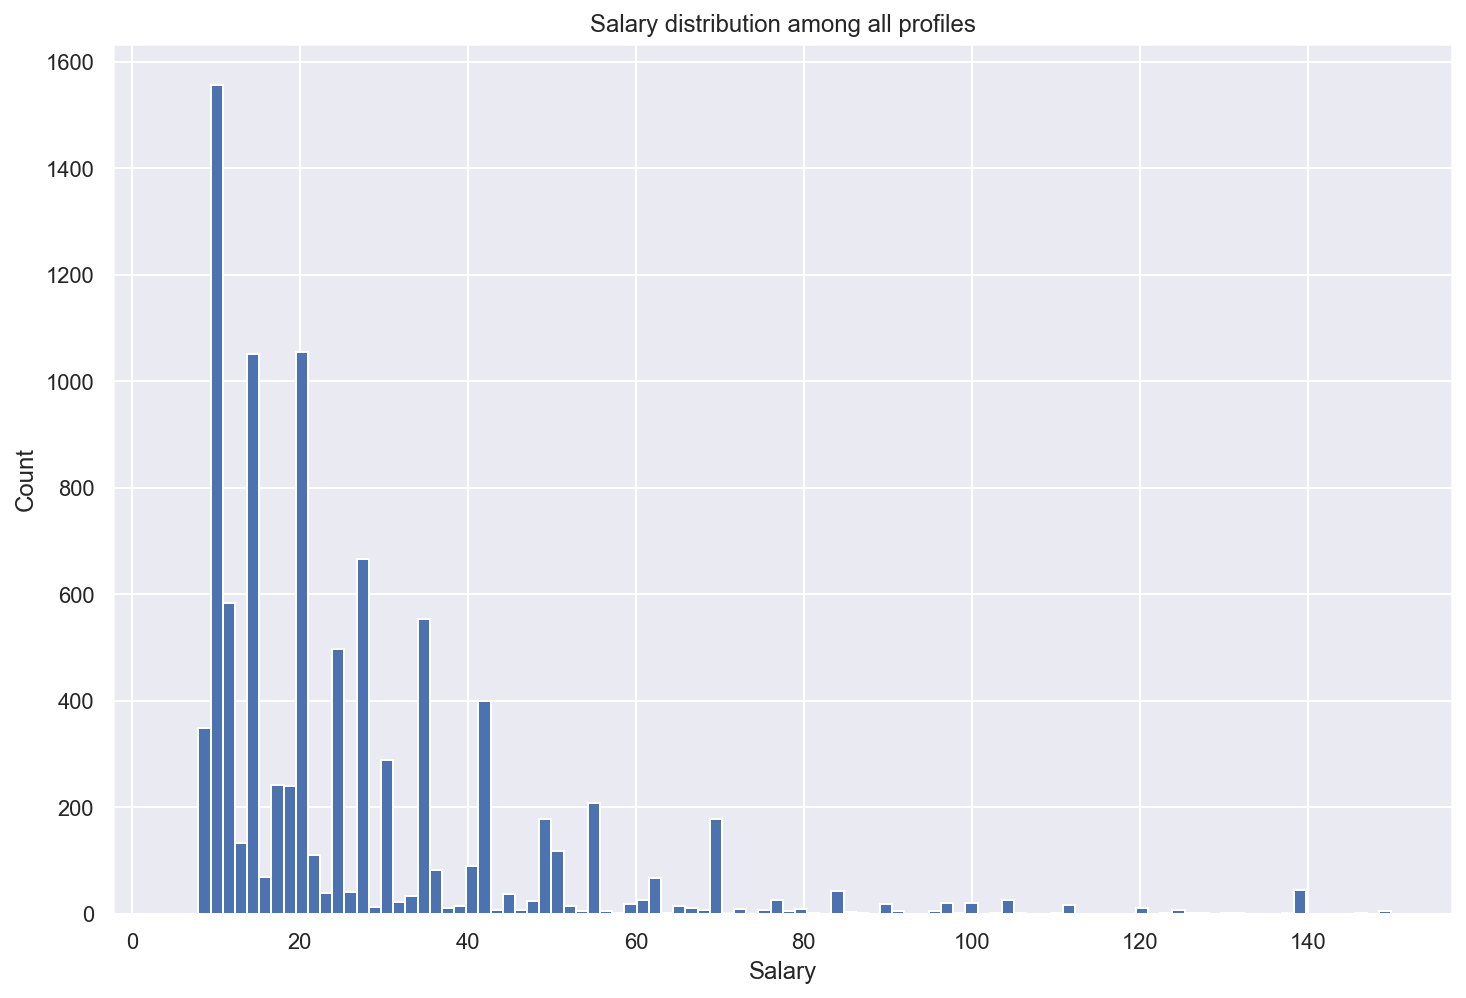

In [71]:
plt.figure(figsize=(12,8))
plt.title('Salary distribution among all profiles')
plt.xlabel('Salary')
plt.ylabel('Count')
data['Price/hour in USD'].hist(bins = 100, range = [5,150])

mean of female salary :  30.38 $
mean of male salary :  29.6 $
mean of undefined salary :  21.05 $


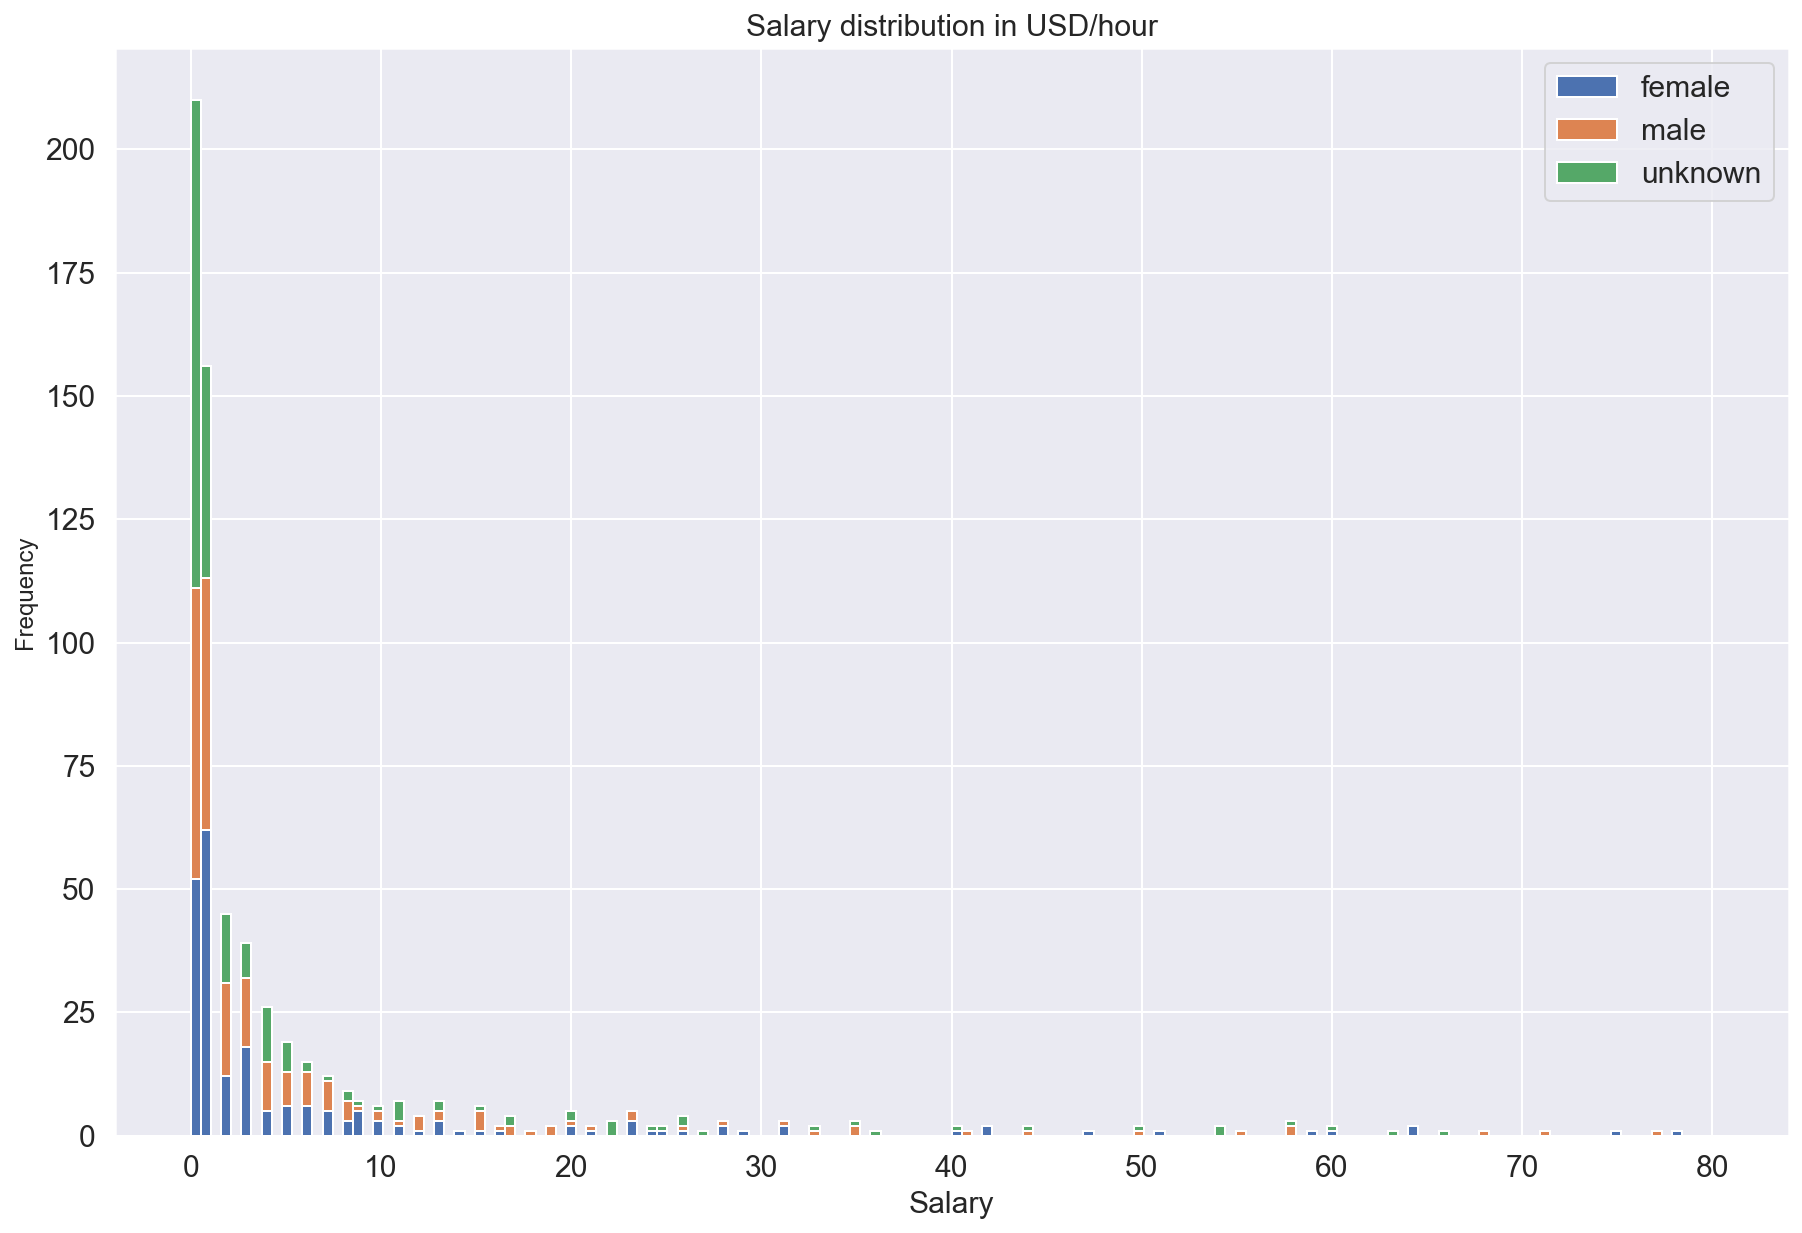

In [112]:
plt_salary_gender = data.groupby(['gender', 'Price/hour in USD'])['Price/hour in USD'].count().unstack('gender').fillna(0)
plt_salary_gender.plot(kind='hist', bins = 150, range = [0,80], stacked = True, figsize=(15,10), fontsize=15)
plt.title('Salary distribution in USD/hour', size=15)
plt.xlabel('Salary', size=15)
plt.legend(fontsize=15)

print('mean of female salary : ', round(data[data['gender'] == 'female']['Price/hour in USD'].mean(),2), '$')
print('mean of male salary : ', round(data[data['gender'] == 'male']['Price/hour in USD'].mean(),2), '$')
print('mean of undefined salary : ', round(data[data['gender'] == 'unknown']['Price/hour in USD'].mean(),2), '$')

plt.show()

(-11.047938615978566,
 11.002282791237075,
 -11.068588494498869,
 11.231899769157437)

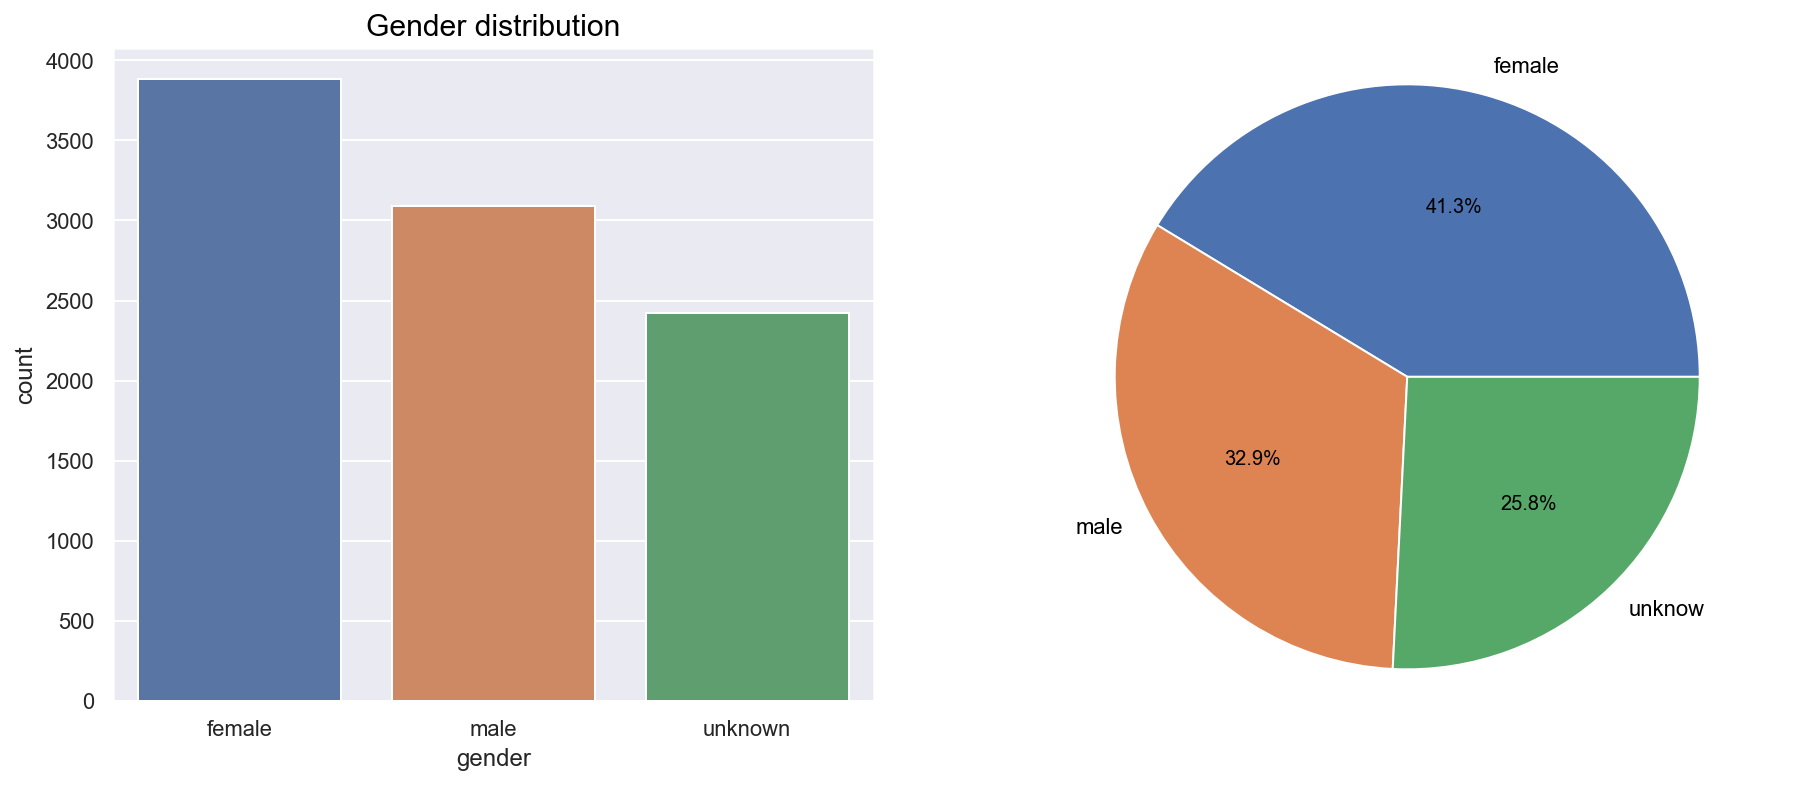

In [84]:
figure = plt.figure(figsize=(15,6))
#plt.title("Gender distribution", color="black", fontsize = 20)

axes = figure.add_subplot(121)
sns.countplot(x='gender', data=data)
plt.title("Gender distribution", color="black", fontsize = 15)


axes = figure.add_subplot(122)
axes.pie(data["gender"].value_counts(),radius = 10, autopct='%1.1f%%', textprops=dict(color="black"), labels=['female', 'male', 'unknow'])

axes.axis('equal')

In [30]:
skills_list = []
for d in data['skills']:
    norm = d.replace("[", "").replace("]", "").replace("'", "").split(',')
    for s in norm :
        skills_list.append(s[1:])
        
print('There are', len(Counter(skills_list)), 'different skills listed by the workers \n')
print('The most common are : \n', Counter(skills_list).most_common(10))

There are 2825 different skills listed by the workers 

The most common are : 
 [('content writing', 7208), ('blog writing', 5636), ('copywriting', 4560), ('creative writing', 3889), ('proofreading', 3428), ('research writing', 2683), ('search engine optimization', 2532), ('roofreading', 2431), ('diting', 2413), ('web writing', 2187)]


In [34]:
expert_list = []
for d in data['industry_expertise']:
    norm = d.replace("Industry expertise:", "").split(',')
    for e in norm :
        expert_list.append(e[1:])
    
print('There are', len(Counter(expert_list)), 'different expertises listed by the workers \n')
print('The most common are : \n', Counter(expert_list).most_common(10))

There are 125 different expertises listed by the workers 

The most common are : 
 [(']', 6090), ("'Marketing'", 3413), ("'Education'", 2979), ("'Advertising'", 2551), ("'IT'", 1738), ("'Internet'", 1691), ("'Media'", 1688), ("'Travel']", 1642), ("'Entertainment'", 1579), ("'Technology']", 1500)]


In [102]:
data[data.gender=='male'].score.mean()

3.24961359223299